# Udacity - Data Analyst Nanodegree - Exploring Weather Trends
**Author:** Dirk Breeuwer
**Date:** October 7 2019

## Outline of steps taken to perform analysis:
* **Tools used:** SQL to extract city data and Python to analyze it
* **Moving averages** calculated using the pandas rolling function with a 10 year window

* **Key considerations** when choosing how to visualize trends:
1. Year was kept as the independent variable and Temperature as the dependent variable throughtout the analysis. This is also seen in all graphs (year) is on the x-axis and temeperature in the y-axis.
2. Regression plots where used to show the strenght of the relationship between associated variables. 

## Loading and preparing data for analysis


In [2]:
# Importing key packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression


In [3]:
# Loading dataset
df = pd.read_csv("cities.csv")

In [4]:
# Exloring dataset structure
df.head(1)

,year,london_temp,global_temp
0,1750,10.25,8.72


In [5]:
# Calculate moving averages
df['london_tmp_yr_ma'] = df['london_temp'].rolling(window=10).mean()
df['global_tmp_yr_ma'] = df['global_temp'].rolling(window=10).mean()

In [6]:
# Pivot 
df2 = pd.melt(df,
            id_vars=["year"],
            value_vars=["london_tmp_yr_ma", "global_tmp_yr_ma","london_temp","global_temp"],
            value_name="observation")
df2 = df2.dropna()

## London temp vs global tem - Line chart
Create a line chart that compares your city’s temperatures with the global temperatures. Make sure to plot the moving average rather than the yearly averages in order to smooth out the lines, making trends more observable (the last concept in the previous lesson goes over how to do this in a spreadsheet).

[Text(0, 0.5, 'Temperature in C'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Global and London temperatures')]

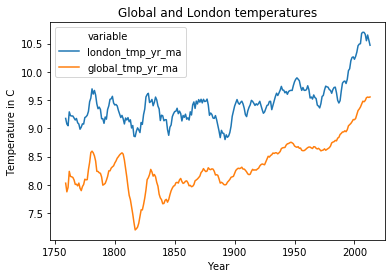

In [39]:
p = sns.lineplot(data=df2.query('variable == "london_tmp_yr_ma" or variable == "global_tmp_yr_ma"'),x="year",y="observation",hue="variable")
p.set(xlabel='Year', ylabel='Temperature in C',title='Global and London temperatures')

## Is london hotter or colder than the global average? How has this changed over time?

**Observation 1**: Over the 300 year period, London was about 1.1 degrees hotter than the global average. This has been reducing over time, starting at around 1.3 degrees hotter, and now bellow 1.0 degree hotter. 

In [8]:
df['temp_diff'] = df['london_temp']-df['global_temp']
df['temp_diff_ma'] = df['temp_diff'].rolling(window=10).mean()

In [9]:
df.describe()

,year,london_temp,global_temp,london_tmp_yr_ma,global_tmp_yr_ma,temp_diff,temp_diff_ma
count,264.000000,264.000000,264.000000,255.000000,255.000000,264.000000,255.000000
mean,1881.500000,9.459735,8.359394,9.450353,8.344286,1.100341,1.106067
std,76.354437,0.668604,0.575184,0.370030,0.440769,0.587167,0.211137
min,1750.000000,6.540000,5.780000,8.802000,7.203000,-0.570000,0.598000
25%,1815.750000,9.055000,8.077500,9.203000,8.053000,0.740000,0.960500
50%,1881.500000,9.425000,8.365000,9.415000,8.274000,1.090000,1.102000
75%,1947.250000,9.880000,8.700000,9.620500,8.636500,1.440000,1.212500
max,2013.000000,11.190000,9.730000,10.701000,9.556000,3.240000,1.757000


[Text(0, 0.5, 'Temperature in C'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Yearly difference between London and global temperatures')]

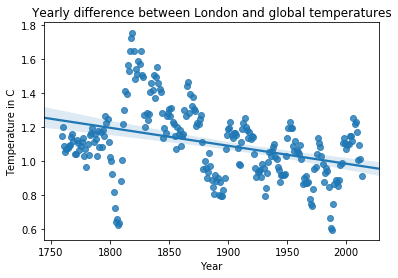

In [38]:
p = sns.regplot(data=df,x="year",y="temp_diff_ma")
p.set(xlabel='Year', ylabel='Temperature in C',title='Yearly difference between London and global temperatures')

## What does the overall trend look like? Is the world getting hotter or cooler?

The world is getting hotter by about **0.005 degrees** per year on average since 1750. Starting between 8 degrees in 1750 and increasing towards 9 degrees on 2013. 

**Observation 2:** London is getting hotter by about **0.003 degrees** per year, **0.002 degrees** lower than the global average.

[Text(0, 0.5, 'Global temperature in C'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Changes in global temperatures over the last 280 years')]

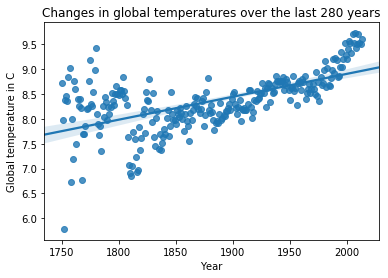

In [34]:
p = sns.regplot(data=df,x="year",y="global_temp")
p.set(xlabel='Year', ylabel='Global temperature in C',title='Changes in global temperatures over the last 280 years')

[Text(0, 0.5, 'London temperature in C'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Changes in London temperatures over the last 280 years')]

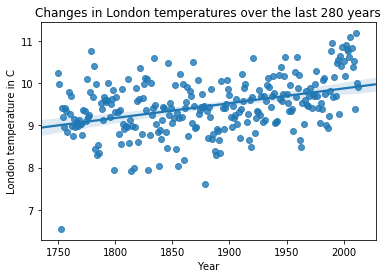

In [35]:
p = sns.regplot(data=df,x="year",y="london_temp")
p.set(xlabel='Year', ylabel='London temperature in C',title='Changes in London temperatures over the last 280 years')

In [13]:
X = df['year']
X = X.values.reshape(-1, 1)
y = df['global_temp']

model = LinearRegression().fit(X, y)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -0.3164109344394479
slope: [0.00461111]


In [17]:
X = df['year']
X = X.values.reshape(-1, 1)
y = df['london_temp']

model = LinearRegression().fit(X, y)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 2.8867803894457893
slope: [0.00349347]


## How was the trend changed in the last 100 years?

The trend increased dramatically in the last 100 years, doubling from 0.005 degrees per year to **0.010 degrees** per year.

**Observation 3:** London temperatures has also increased by about **0.010 degrees** per year over the last 100 years.

**Observation 4:** The standard deviation and variation in yearly temperatures in London are much higher than for the rest of the world. 

[Text(0, 0.5, 'Global temperature in C'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Changes in global temperatures over the last 100 years')]

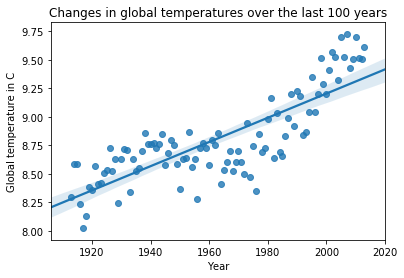

In [32]:
df_100 = df[df.year > 1912]
p = sns.regplot(data=df_100,x="year",y="global_temp")
p.set(xlabel='Year', ylabel='Global temperature in C',title='Changes in global temperatures over the last 100 years')

[Text(0, 0.5, 'London temperature in C'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Changes in London temperatures over the last 100 years')]

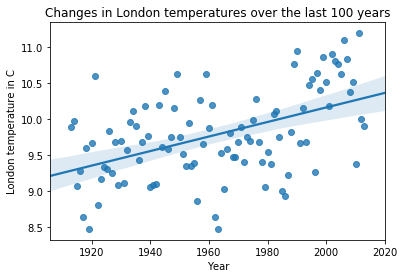

In [31]:
df_100 = df[df.year > 1912]
p = sns.regplot(data=df_100,x="year",y="london_temp")
p.set(xlabel='Year', ylabel='London temperature in C',title='Changes in London temperatures over the last 100 years')

In [ ]:
df_100 = df[df.year > 1912]
p = sns.regplot(data=df_100,x="year",y="global_temp")

In [21]:
X = df_100['year']
X = X.values.reshape(-1, 1)
y = df_100['global_temp']

model = LinearRegression().fit(X, y)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -12.0576626674432
slope: [0.0106311]


In [22]:
X = df_100['year']
X = X.values.reshape(-1, 1)
y = df_100['london_temp']

model = LinearRegression().fit(X, y)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -9.987284216656965
slope: [0.01007513]


Done! 